In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_table('CD0497_genotyped_db-pass-props.tab')
df.head()

two = pd.read_table('CD0497_genotyped_db-pass-props.tab')

In [27]:
# healthy
df = pd.read_table('resultsHC_12_BB_genotyped_db-pass-props.tab')

In [28]:
#remove samples with OR [non functional]
df2 = df[~df.V_CALL.str.contains('OR')]

#remove nonfunctional samples
   #df2 = df[~df.STOP.str.contains('True')]

# remove irrelevant junction length (minimum of 3 nucleutides for create AA), for translat to protein the sequence need to modulu 0 when diveded by 3
  #for create a protein the sequence need to contain minimum 4 AA, namely 12 nucleutides
df2 = df2[df2.JUNCTION_LENGTH%3==0]
df2 = df2[df2.JUNCTION_LENGTH>=12]

# remove rows with junction contains '-' , they can not be tranlate to AA
JUNCTION_index=np.where(df2['JUNCTION'].str.contains('-',regex=True))
JUNCTION_index_list= df2.iloc[JUNCTION_index].index.tolist()
df2 = df2.drop(df2.index[JUNCTION_index_list])
df2 = df2.reset_index(drop=True)

In [4]:
df

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,V_CALL,D_CALL,J_CALL,...,CLIN,CDR3_AA_LENGTH,CDR3_AA_GRAVY,CDR3_AA_BULK,CDR3_AA_ALIPHATIC,CDR3_AA_POLARITY,CDR3_AA_CHARGE,CDR3_AA_BASIC,CDR3_AA_ACIDIC,CDR3_AA_AROMATIC
0,AAGACAAAATTTTAACG,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,True,True,False,NaN,False,IGHV4-59*01,"IGHD2-2*02,IGHD2-2*03,IGHD6-13*01",IGHJ4*02,...,Celiac,12.0,-0.983333,14.985833,0.408333,8.300000,0.106150,0.166667,0.083333,0.416667
1,AATGCAGAATGAACTTA,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,True,True,False,NaN,False,IGHV3-11*01,IGHD6-13*01,IGHJ4*02,...,Celiac,13.0,0.084615,13.388462,0.607692,7.892308,-0.005666,0.076923,0.076923,0.307692
2,GAGTATCATAATTTAGC,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGG...,True,True,False,NaN,False,IGHV1-46*01,IGHD3-10*01,IGHJ3*02,...,Celiac,15.0,-0.260000,13.600000,0.653333,8.740000,-1.887059,0.133333,0.200000,0.200000
3,AGCGGTACAATACAAGG,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,True,True,False,NaN,False,IGHV3-23*01,IGHD6-13*01,IGHJ3*02,...,Celiac,14.0,-1.471429,14.641429,0.421429,9.592857,0.000145,0.214286,0.214286,0.142857
4,AAATGACAAGCAGCTAA,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,True,True,False,NaN,False,IGHV3-48*01,IGHD3-10*01,IGHJ6*02,...,Celiac,16.0,-0.406250,14.285625,0.487500,7.987500,-1.005350,0.062500,0.125000,0.312500
5,GCTGAAGGCACTTCTAC,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,True,True,False,NaN,False,IGHV3-30*18,IGHD3-3*01,IGHJ4*02,...,Celiac,12.0,0.183333,14.921667,0.891667,8.233333,-1.001572,0.083333,0.166667,0.166667
6,GACTAATGGAGTAACCG,GAGGTGCAGCTGGTGCAGTCTGGNGCAGAGGTGAAAAAGCCCGGGG...,True,True,False,NaN,False,IGHV5-51*01,IGHD6-19*01,IGHJ3*02,...,Celiac,17.0,-0.705882,12.470588,0.517647,9.158824,-2.000373,0.117647,0.235294,0.117647
7,CGGGAAAAGTAATGGCC,GAGGTGCAGCTGGTGGAGACTGGAGGAGGCTTGATCCAGCCTGGGG...,True,True,False,NaN,False,IGHV3-53*02,IGHD1-26*01,IGHJ6*02,...,Celiac,21.0,-1.547619,13.377619,0.185714,9.147619,0.106376,0.190476,0.142857,0.190476
8,GCGAAACTTCTAAGACT,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,True,True,False,NaN,False,IGHV3-23*01,IGHD5-12*01,"IGHJ4*02,IGHJ5*02",...,Celiac,13.0,-0.930769,11.013077,0.376923,8.815385,0.995928,0.153846,0.076923,0.153846
9,AAGAAAAGCTATGAGAC,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGG...,True,True,False,NaN,False,IGHV1-2*02,IGHD2-15*01,IGHJ4*02,...,Celiac,10.0,-1.090000,10.637000,0.100000,9.270000,-1.074955,0.100000,0.200000,0.100000


# histograms

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.image as mpimg

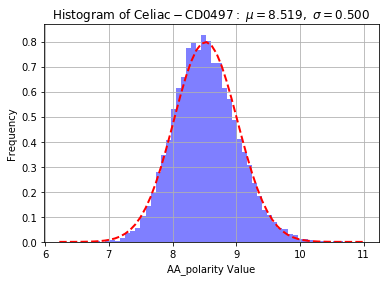

In [55]:
## histogram for CDR3_AA_POLARITY
# best fit of data

(mu, sigma) = norm.fit(df2['CDR3_AA_POLARITY'])
samp_name = df2['SAMPLE'][1]
status = df2['CLIN'][1]

#open figure
fig = plt.figure()

# the histogram of the data
n, bins, patches = plt.hist(df2['CDR3_AA_POLARITY'],60, normed=1, alpha=0.5, facecolor='blue')

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('AA_polarity Value')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ of\ %s - %s :}\ \mu=%.3f,\ \sigma=%.3f$' %(status,samp_name,mu, sigma))
plt.grid(True)

p1 = plt.show()

#save figure
fig.savefig('p1-plot.png')


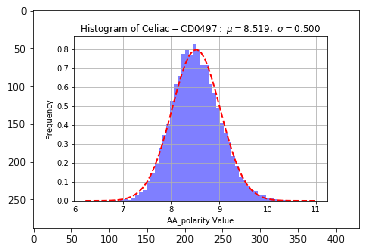

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('p1-plot.png')
imgplot = plt.imshow(img)
plt.show()

In [20]:
## histogram for CDR3_AA_POLARITY
# best fit of data
def hist_feature(data,feature):

    (mu, sigma) = norm.fit(df2[feature])
    samp_name = df2['SAMPLE'][1]
    status = df2['CLIN'][1]

    #open figure
    fig = plt.figure()

    if status=='Celiac':
        hist_color='blue'
    else:
        hist_color='green'
        
    # the histogram of the data
    n, bins, patches = plt.hist(df2[feature],60, normed=1, alpha=0.5, facecolor=hist_color)

    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    #plot
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(r'$\mathrm{Histogram\ of\ %s - %s :}\ \mu=%.3f,\ \sigma=%.3f$' %(status,samp_name,mu, sigma))
    plt.grid(True)

    p1 = plt.show()

    #save figure
    fig.savefig('p1-plot.png')
    return (fig,mu,sigma,status,l)


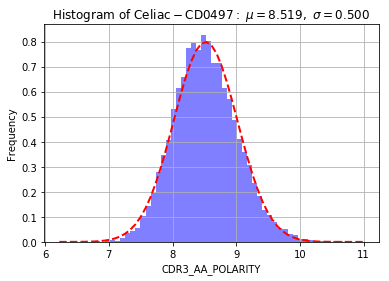

In [26]:
pic1,mu1,sigma1,status1,l2= hist_feature(df2,'CDR3_AA_POLARITY')

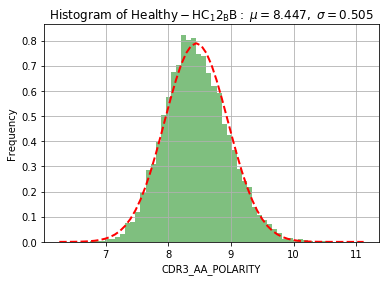

In [30]:
pic1,mu1,sigma1,status1,l2= hist_feature(df2,'CDR3_AA_POLARITY')

NameError: name 'pic1' is not defined